In [1]:
# 데이터 분석
import pandas as pd
import numpy as np

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from wordcloud import WordCloud


In [3]:
# 정규표현식
import re

In [4]:
# 형태소 분석
from konlpy.tag import Okt

In [5]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
font_path = r'c:\windows\Fonts\malgun.ttf'
stopwords = []

def display_word_cloud(data,/,*,width=1200, height=500, stopwords=[],mask=None) :
    wordcloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,    
        random_state=2024,
#         background_color='#fff',
        stopwords=stopwords,  # 불용어 제거
        mask=mask,
    ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return wordcloud

In [7]:
# 음식 리뷰
corpus = [
    "샐러드 맛이 깔끔해서 좋아요.",
    "주문한 음식이 늦게 와서 배고팠어요.",
    "피자가 맛있어요.",
    "라면이 너무 짜게 나왔어요.",
    "배달된 치킨이 맛있어요.",
    "메뉴 설명보다 양이 적어요.",
    "주문한 음식이 다른 것으로 와서 다시 주문했어요.",
    "맛은 좋은데 양이 좀 적은 편이에요.",
    "떡볶이의 매운맛이 적절해요.",
    "초밥이 신선해서 좋았어요.",
    "빵이 부드럽고 맛있네요!",
    "스테이크가 너무 질겼어요.",
    "샐러드의 드레싱이 너무 강했어요.",
    "나초의 치즈소스가 맛있었어요.",
    "파스타가 약간 덜 익은 것 같아요.",
    "커피가 너무 진해서 물을 더 추가했어요.",
    "디저트는 달지 않아서 좋았습니다.",
    "음료가 너무 달아서 다음엔 당도 조절할게요.",
    "피자 도우가 너무 두꺼워서 먹기 힘들었어요.",
    "햄버거의 빵이 너무 딱딱해요.",
    "감자튀김이 너무 기름져서 느끼했어요.",
    "치즈케이크가 아주 부드럽고 맛있어요."
]

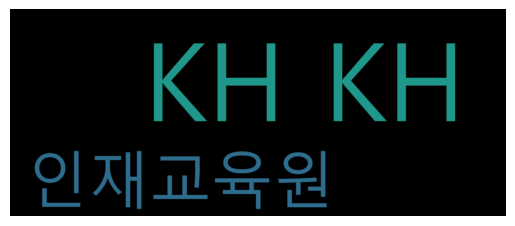

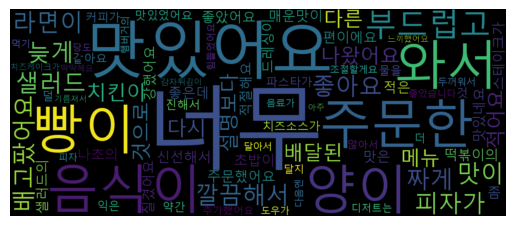

In [8]:
display_word_cloud('KH 인재교육원 KH KH KH KH KH KH KH KH')
display_word_cloud(' '.join(corpus))


In [30]:
cvect = CountVectorizer(max_features=30)
tfidvect = TfidfVectorizer(max_features=30)

In [32]:
x_cvect = cvect.fit(corpus)
x_tfidvect = tfidvect.fit(corpus)

In [33]:
x_vect_dtm = x_cvect.transform(corpus)
x_tfidvect_dtm = x_tfidvect.transform(corpus)

In [34]:
x_vect_dtm, x_tfidvect_dtm

(<22x30 sparse matrix of type '<class 'numpy.int64'>'
 	with 45 stored elements in Compressed Sparse Row format>,
 <22x30 sparse matrix of type '<class 'numpy.float64'>'
 	with 45 stored elements in Compressed Sparse Row format>)

In [35]:
df_x_vect_dtm = pd.DataFrame(x_vect_dtm.toarray(),columns=x_cvect.get_feature_names_out())
display(df_x_vect_dtm.head(2))
df_x_tfidvect_dtm = pd.DataFrame(x_tfidvect_dtm.toarray(),columns=x_tfidvect.get_feature_names_out())
display(df_x_tfidvect_dtm.head(2))

,감자튀김이,너무,맛있어요,부드럽고,빵이,신선해서,아주,않아서,약간,양이,...,좋았어요,주문한,치즈소스가,치즈케이크가,치킨이,커피가,파스타가,편이에요,피자,피자가
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,감자튀김이,너무,맛있어요,부드럽고,빵이,신선해서,아주,않아서,약간,양이,...,좋았어요,주문한,치즈소스가,치즈케이크가,치킨이,커피가,파스타가,편이에요,피자,피자가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


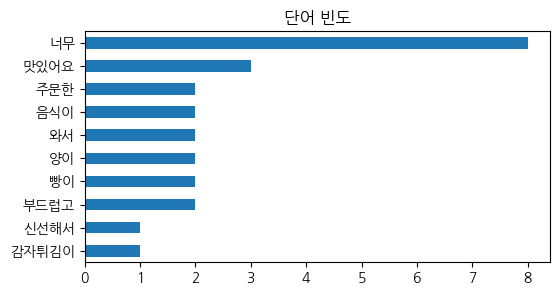

In [39]:
plt.figure(figsize=(6,3))
df_x_vect_dtm.sum().nlargest(10).sort_values().plot.barh()
plt.title('단어 빈도')
plt.show()

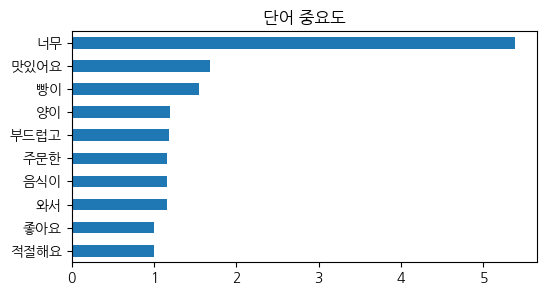

In [41]:
plt.figure(figsize=(6,3))
df_x_tfidvect_dtm.sum().nlargest(10).sort_values().plot.barh()
plt.title('단어 중요도')
plt.show()